## EECS 531 Assignment 1

Due Saturday Feb 15 before midnight. 120 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A1-yourcaseid.ipynb`
  - `EECS531-A1-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A1-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A1-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Some of exercises below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the readings and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  Since each exercise is only worth 5 pts, in terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Hao Li -- hxl1033

### Exercise 1. Convolution (15 pts)

1.1 (5 pts) Using the discrete definition, show that convolution is a linear operation, i.e.

$$
(f + g) * c = f*c + g*c \quad \textrm{and} \quad (\lambda f)*c = \lambda(f*c)
$$


1.2. (5 pts) Show that the convolution of a separable two-dimensional filter kernel $\mathbf{K} = \mathbf{u}\mathbf{v^T}$ is equivalent to a 1-D horizontal convolution with kernel $\mathbf{h}$ followed by a 1-D vertical convolution with kernel $\mathbf{v}$.

1.3. (5 pts) Describe the advantages and limitations of such an approach.

#### 1.1 Answer
We have the equation that
$$(f+g)*c=\sum_{k,l}[(f(i+k,j+l)+g(i+k,j+l))*c(k,l)]$$
According to distributive law
$$=\sum_{k,l}[f(i+k,j+l)*c(k,l)]+\sum_{k,l}[g(i+k,j+l)*c(k,l)]$$
On the other way, we have
$$f*c+g*c=\sum_{k,l}[f(i+k,j+l)*c(k,l)]+\sum_{k,l}[g(i+k,j+l)*c(k,l)]$$
Therefore, we can get 
$$(f+g)*c=f*c+g*c$$





Similarly, We have the equation that
$$(\lambda f)*c=\sum_{k,l}[(\lambda f(i+k,j+l))*c(k,l)]$$
According to distributive law
$$=\lambda\sum_{k,l}[f(i+k,j+l)*c(k,l)]$$
On the other way, we have
$$\lambda\sum_{k,l}[f(i+k,j+l)*c(k,l)]=\lambda(f*c)$$
Therefore, we can get 
$$(\lambda f)*c=\lambda(f*c)$$
We can see that convolution is a linear operation.

#### 1.2 Answer
We have the convolution equation as follows
$$g(i,j)=\sum_{k,l}[(f(i+k,j+l))*K(k,l)]$$
For 1-D horizontal convolution, we have
$$a(i,j)=\sum_{l}[(f(i,j+l))*h(0,l)].......eq.1$$
For 1-D vertical convolution, we have
$$b(i,j)=\sum_{k}[(a(i+k,j))*v(k,0)].......eq.2$$
If we combine eq.1 & eq.2, we will get
$$b(i,j)=\sum_{k}\sum_{l}(f(i+k,j+l))*h(0,l)*v(k,0)$$
In the question we have $K=uv^{T}$, then we have
$$\sum_{k}\sum_{l}(f(i+k,j+l))*h(0,l)*v(k,0)=\sum_{k,l}[(f(i+k,j+l))*K(k,l)]$$




#### 1.3 Answer
Pros: Such approach can be more efficient. Since it saves memory space and uses simpler calculation, the time spent and memory cost will be lower.
Cons: Not ALL kernels are seperable, this approach is not univerisal.

### Exercise 2.  Linear Filtering (20 pts)

Here you will write functions to implement 2D filtering.  Refer to Szeliski chapter 3 and more specifically section 3.2.  For this exercise, you should implement the filter functions "by hand", i.e. do not use a library.  Your answers should be explanatory.

2.1 (5 pts) Write a function that implements linear filtering (i.e. equation 3.12 or 3.14 in Szeliski).  Write a short "doc string" that explains your function and its arguments.  Also explain how you handled boundaries.

2.2 (5 pts) Demonstrate the correctness of your implementation.

2.3 (5 pts) Define blurring filters of different sizes and apply them to images.  Explain how the kernel structure achives the blurring operation, and illustrate it by showing original and filtered images side by side.

2.4 (5 pts) Define a different filter kernel (besides blurring).  Demonstrate it by apply it to images and explain how its structure achieves the intended function.  

In [1]:
# 2.1
import numpy as np

'''
My function linear_filter takes 2 inputs, and produces 1 output.  
INPUT  -- image -> the image data. it is an array to be precise.
       -- kernel -> the kernel applied, it should be a 3-by-3 kernel in this case.
       
OUTPUT -- new_img -> the processed image data. it is an array to be precise.
'''
def linear_filter(image, kernel):
    img_height = image.shape[0]
    img_width = image.shape[1]
    knl_height = kernel.shape[0]
    knl_width = kernel.shape[1]
    '''
    I used equation 3.12 to implement my filter function. Since the kernel in this part is a 3-by-3 matrix, I used
    absolute index of the kernel to do the multiplication. 
    The following variable new_img is initialized to be all zeroes. Due to the border effect, I left the edges to 
    be zeros as default.
    '''
    new_img = np.zeros((img_height, img_width))
    for i in range(knl_height-1, img_height-knl_height+1):
        for j in range(knl_width-1, img_width-knl_width+1):
            # For the image, i is row No., j is column No.
            tmp = 0
            for k in range(0, knl_height):
                for l in range(0, knl_width):
                    # For the kernel, k is row No., l is column No.
                    tmp += image[i+k-1][j+l-1] * kernel[k][l]
            new_img[i][j] = tmp
    return new_img

In [2]:
# 2.2
from skimage.color import rgb2gray
from skimage import data, io, util, filters
import matplotlib.pyplot as plt
import numpy as np

sample_image = rgb2gray(data.chelsea())
# the following is to add some random Gaussian noise to the image.
noisy_image = util.random_noise(sample_image, mode = 'gaussian')
#bili_filter_kernel = 1/16 * np.array(([1, 2, 1], [2, 4, 2], [1, 2, 1]))
#sharpen_filter_kernel = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]))
#sobel_filter_kernel = 1/8 * array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
box_filter_kernel = 1/9 * np.array(([1, 1, 1], [1, 1, 1], [1, 1, 1]))

result_bili = linear_filter(sample_image, box_filter_kernel)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.title('Before being filtered')
plt.imshow(sample_image, cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.title('Filtered by Box Filter')
plt.imshow(result_bili, cmap='gray'), plt.axis('off')

plt.show()

<Figure size 1000x500 with 2 Axes>

##### 2.2 continued..
You may see that in the testing part, I plotted the original picture first. And then I used the Box_Filter as my filter kernel. It is obvious that after processing the noisy picture, the picture become smoother, and with less image detail. 

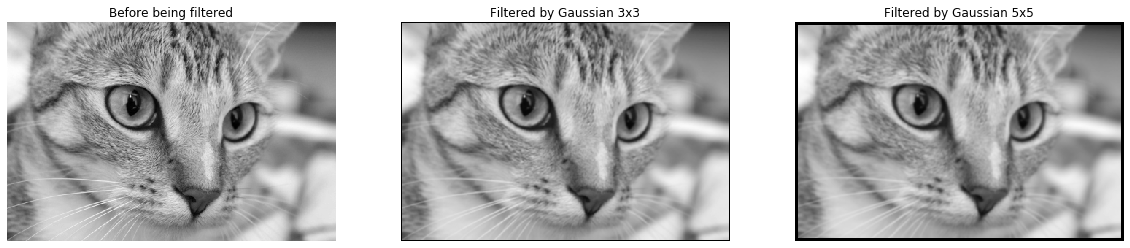

In [3]:
# 2.3
from skimage.color import rgb2gray
from skimage import data, io, util
import matplotlib.pyplot as plt
import numpy as np

sample_image = rgb2gray(data.chelsea())
gaus3by3_filter_kernel = 1/16 * np.array(([1, 2, 1], [2, 4, 2], [1, 2, 1]))
gaus5by5_filter_kernel = 1/256 * np.array(([1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], 
                                       [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]))

result_gaus33 = linear_filter(sample_image, gaus3by3_filter_kernel)
result_gaus55 = linear_filter(sample_image, gaus5by5_filter_kernel)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1), plt.title('Before being filtered')
plt.imshow(sample_image, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 2), plt.title('Filtered by Gaussian 3x3')
plt.imshow(result_gaus33, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 3), plt.title('Filtered by Gaussian 5x5')
plt.imshow(result_gaus55, cmap='gray'), plt.axis('off')

plt.show()

##### 2.3 continued..
Blurring is achieved by calculating new pixel value of a pixel by assigning different weights of adjacent pixel values and summing them up. The larger scale of the Gaussian kernel is, the more blurred the output image will be.

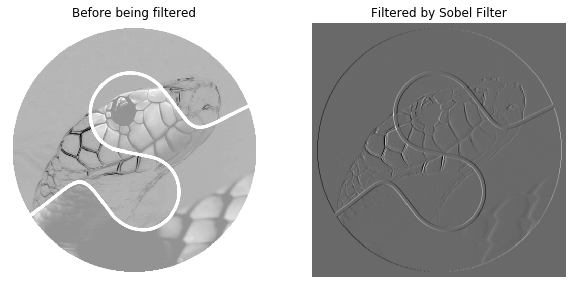

In [4]:
# 2.4
from skimage.color import rgb2gray
from skimage import data, io, util
import matplotlib.pyplot as plt
import numpy as np

sample_image = rgb2gray(data.logo())
sobel_filter_kernel = 1/8 * np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))

result_gaus = linear_filter(sample_image, sobel_filter_kernel)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.title('Before being filtered')
plt.imshow(sample_image, cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.title('Filtered by Sobel Filter')
plt.imshow(result_gaus, cmap='gray'), plt.axis('off')

plt.show()

### Exercise 3.  Non-linear Filtering (15 pts)

In this exercise you should also implement the filter by hand.  You should be able to modify your code from the previous exercise.

3.1 (5 pts) Define a function that implements some type of *non-linear* filtering.  

3.2 (5 pts) Show why this cannot be implemented by a linear filter.

3.3 (5 pts) Demonstrate this filter by applying it to images that are appropriate for illustrating its function.

In [5]:
# 3.1
def median_NL_filter(image):
    img_height = image.shape[0]
    img_width = image.shape[1]
    new_img = np.zeros((img_height, img_width))

    
    for i in range(1, img_height-1):
        for j in range(1, img_width-1):
            temp = []
            temp.append(image[i-1][j-1])
            temp.append(image[i-1][j])
            temp.append(image[i-1][j+1])
            temp.append(image[i][j-1])
            temp.append(image[i][j+1])
            temp.append(image[i+1][j-1])
            temp.append(image[i+1][j])
            temp.append(image[i+1][j+1])
            new_img[i][j] = np.median(temp)
    return new_img

#### 3.2 Answer
Because choosing a median among 8 pixel values is not a linear process.


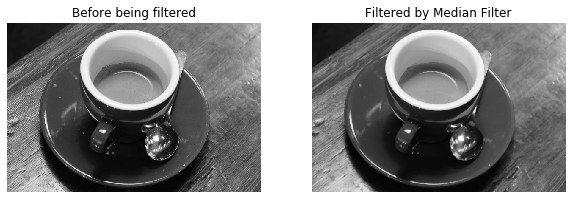

In [6]:
# 3.3
from skimage.color import rgb2gray
from skimage import data, io, util
import matplotlib.pyplot as plt
import numpy as np

sample_image = rgb2gray(data.coffee())

median_result = median_NL_filter(sample_image)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.title('Before being filtered')
plt.imshow(sample_image, cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.title('Filtered by Median Filter')
plt.imshow(median_result, cmap='gray'), plt.axis('off')

plt.show()

### Exercise 4. Edge Detection (30 pts)

In this exercise, you will need to choose an image processing libary that provides edge detection (see Szeliski chapter 4).  It should provide different types of edge detection and allow for control over smoothing.

4.1 (5 pts) Explain how you chose your library and what options you considered (briefly) and demonstrate the interface on two different types of edge detection algorithms.

4.2 (5 pts) Select a few noise-free images and show how edge detection can work at some scales but not at others.  Explain what is happening in terms of the edge-detection algorithm.

4.3 (5 pts) Add varying amounts of noise to an image and show how edge detection degrades.  Again explain what is happening in terms of the algorithm.

4.4 (5 pts) Now use these same noisy images but use smoothing to improve the edge detection and compare the results to the original noise-free image.

4.5 (5 pts) Select images to illustrate how an edge detection can detect numerous types of boundaries that correspond to distinct types of structure in the real world.

4.6 (5 pts) Now select images to illustrate different ways in which edge detection can fail, in the sense that the boundary is clear visible to us, but isn't detectable by the algorithm.

#### 4.1
I chose the library skimage on the web. I noticed there are mainly two popular libraries, OpenCV and SKImage. I decided to use SKImage because it is easier for a starter.

There are 3 major edge detecting algorithms, they are Canny, Sobel and Laplacian. I chose Canny and Sobel.

In [7]:
# 4.1 Continued..
# The following is a simple program for saving some time.
def display_output(image):
    from skimage import feature, filters
    test_img_page = rgb2gray(image)
    canny_result = feature.canny(test_img_page, sigma = 2)
    sobel_result = filters.sobel(test_img_page)

    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1), plt.title('Orignial')
    plt.imshow(test_img_page, cmap='gray'), plt.axis('off')
    plt.subplot(1, 3, 2), plt.title('Edge Detected by Canny')
    plt.imshow(canny_result, cmap='gray'), plt.axis('off')
    plt.subplot(1, 3, 3), plt.title('Edge Detected by Sobel')
    plt.imshow(sobel_result, cmap='gray'), plt.axis('off')
    plt.show()
    return None

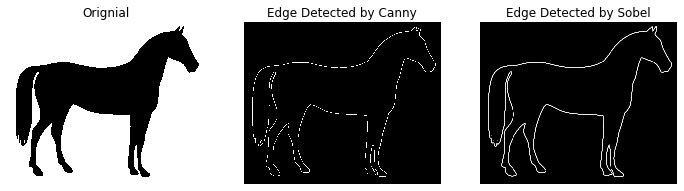

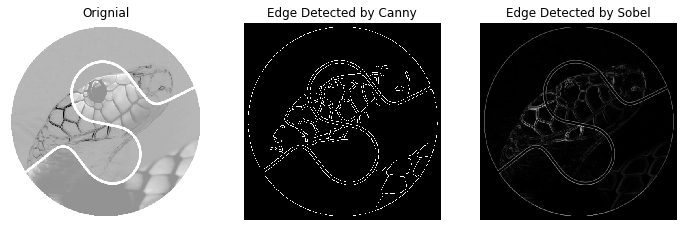

In [8]:
# 4.2
display_output(data.horse())
display_output(data.logo())

##### 4.2 Continued..
Both 2 edge detecting algorithms successfully captured major edges on both images. The algorithms are mainly trying to find the sharp contrast of pixel values. That is how the algorithms work.

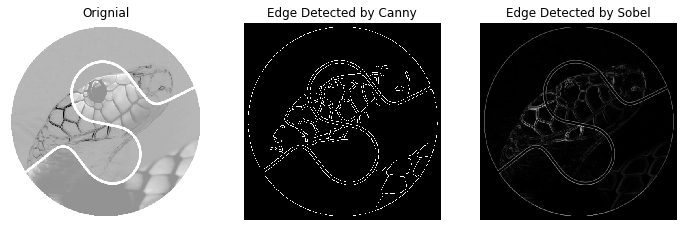

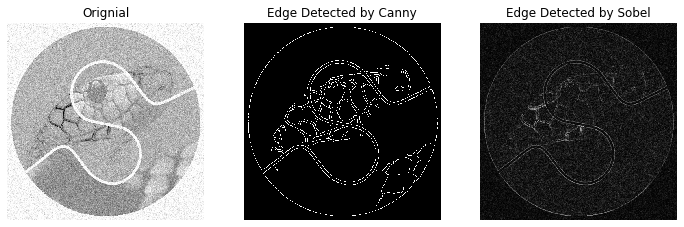

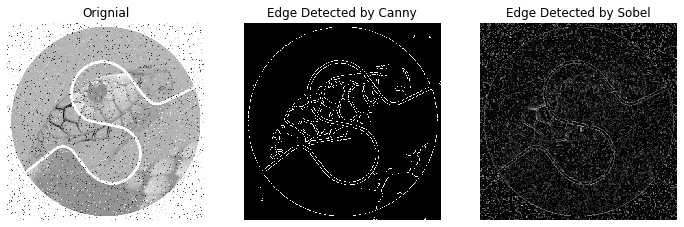

In [9]:
# 4.3
display_output(data.logo())
gau_logo = util.random_noise(data.logo(), mode = 'gaussian')
display_output(gau_logo)
snp_logo = util.random_noise(data.logo(), mode = 's&p')
display_output(snp_logo)

##### 4.3 Continued..
We can see that edge detection by Canny failed and Sobel did okay when the original image is noisy. Especially a salt&pepper noise to Canny filter, basically no edges can be detected. Hence Canny filter is vulnerable to Gaussian noises.

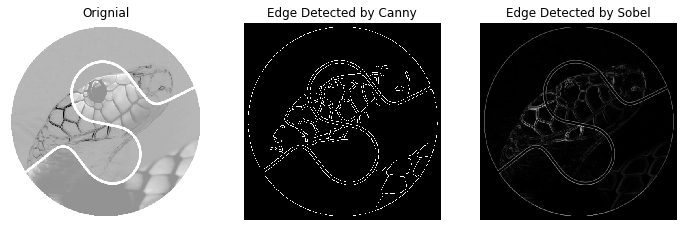

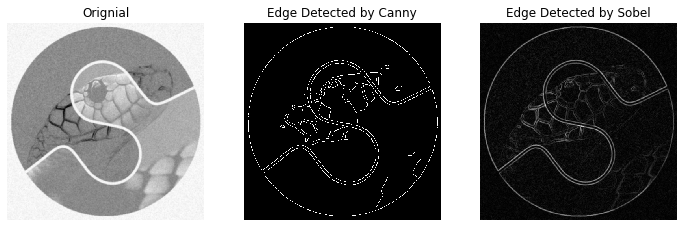

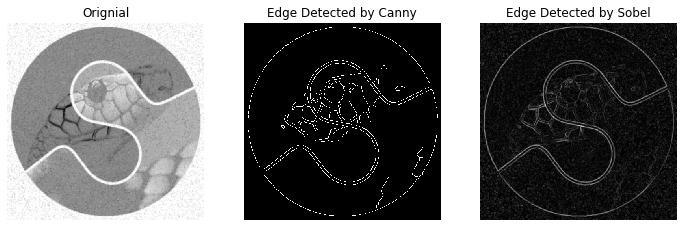

In [10]:
# 4.4
display_output(data.logo())
display_output(filters.gaussian(gau_logo))
display_output(filters.gaussian(snp_logo))

##### 4.5 Continued..
When the original noisy images have been smoothened, both Canny and Sobel can work well.

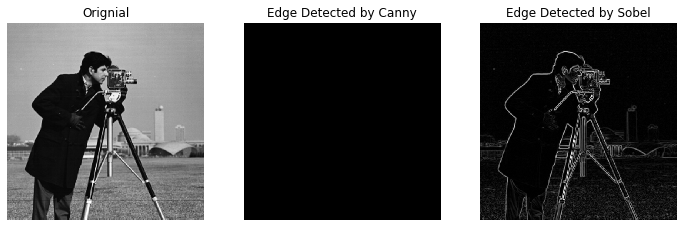

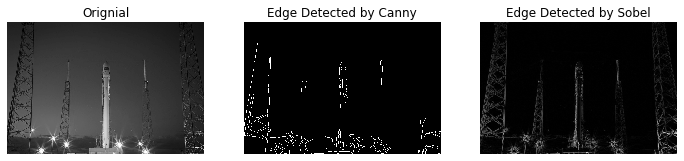

In [11]:
# 4.5
display_output(data.camera())
display_output(data.rocket())

##### 4.5 Continued..
We can see the two algorithms worked differently on two real world photos. Sobel worked good on the first one and Canny worked well on the second one. Maybe Canny can capture more details while Sobel can only capture major contour.

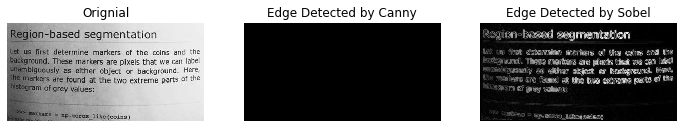

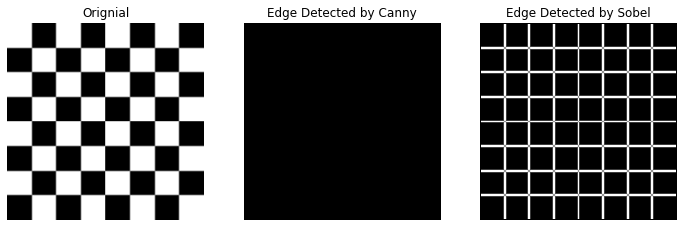

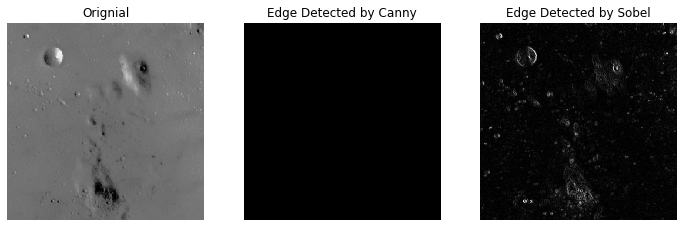

In [12]:
# 4.6
display_output(data.page())
display_output(data.checkerboard())
display_output(data.moon())


##### 4.6 continued..
As you can see on the output above, the letters appears on the image ${Page}$, the boxes on the image ${Checkerboard}$ and the dents on the image ${Moon}$ are very easy to be recoginized by human eyes, but the Canny filter failed. It detected nothing. (While Sobel did pretty well!)

### Exploration (40 pts)

In these problems, you are meant to do creative exploration. This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- any of the exercises in Szeliski Ch. 3.

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

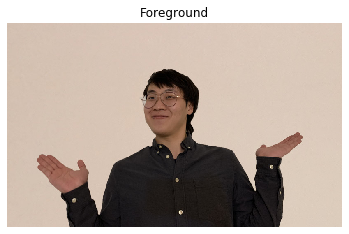

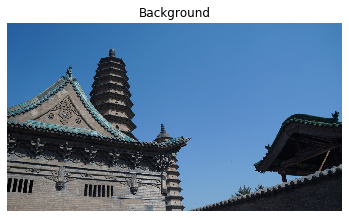

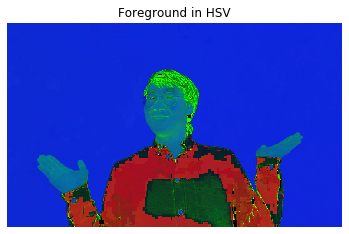

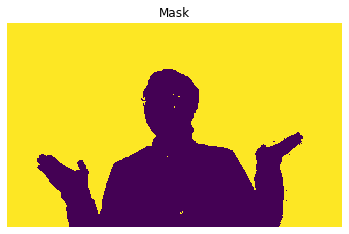

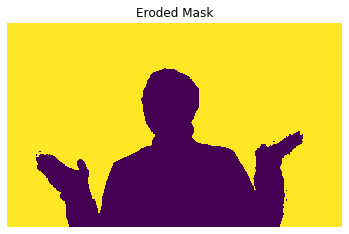

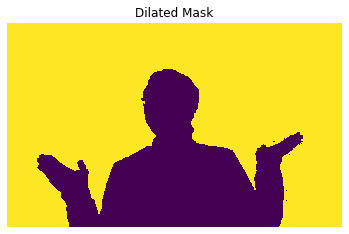

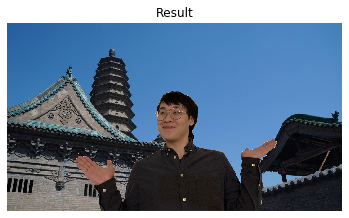

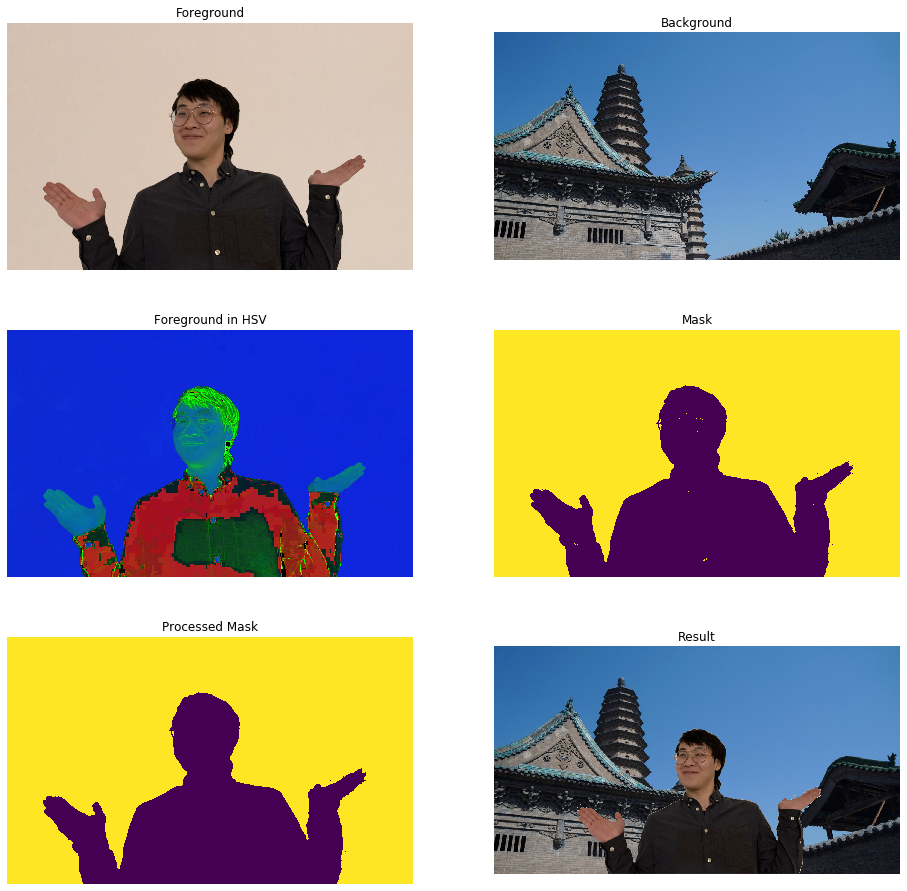

In [3]:
# Exploration
'''
This exploration part is called 'BeAtHome'.

After reading Szeliski Ch. 3, I found compositioning and matting very intersing.
I have been away from home for half a year and I miss my hometown, so I came up an idea.
Hey, why don't I make and picture to pretend me visiting an attraction at home?
Then I get started.

Note: I read and searched for some necessary background knowledge.
'''
# Import some necessary libraries.
# cv2 is for image processing
# numpy is for calculation
# matplotlib is for showing pictures
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Here I defined a small function to save some time.
# Objective: Display input image
# Input -- image -> the image which will be displayed
#       -- title -> the title of the image
def show(image, title):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Import an image, which will be used as Foreground.
# In this example, the person appears on the image is me.
me_img = cv2.imread('selfie.jpg')

# Since OpenCV uses BGR as default format of an image, we usually use RGB.
# We need to transform the format from BGR to RGB to avoid possible distortion.
me_img = cv2.cvtColor(me_img, cv2.COLOR_BGR2RGB)

# Print the size of the image. (Height, Width, Channels)
show(me_img, 'Foreground')

# Keep the size of Foreground image for future use.
height, width, channels = me_img.shape


# Import an image, which will be used as Background.
# In this example, the place appears on the image is a famous attraction in my hometown.
bg_img = cv2.imread('taiyuan.jpg')
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)
rua = bg_img

# Zoom out the Background image for 10%.
bg_img = cv2.resize(bg_img, None, fx=0.9, fy=0.9) #图片缩小10%
show(bg_img, 'Background')

# The following is the key part of Composition and Matting. 
# First, we need to transform the Foreground image to HSV format. 
# That could be easier for us to process color digitally.
me_hsv = cv2.cvtColor(me_img,cv2.COLOR_RGB2HSV)
show(me_hsv, 'Foreground in HSV')

# Now, we can easily conceive we could just remove the blue part on the image.
# All we need to do is to set thresholds, and use the following inRange fuction,
# to check if every pixels is in the range of Min~Max. 
# If yes, assign 255, indicates the part on image we will discard.
# If no, assign 0, indicates the part on image we will keep.

lower_blue = np.array([0,20,180]) # the Min threshold
upper_blue = np.array([18,255,255]) # the Max threshold
shadow = cv2.inRange(me_hsv, lower_blue, upper_blue) # the mask
show(shadow, 'Mask')


# It is easy to be noticed that, although the basic contour of Foreground image is there,
# there are still some noise points in the dark zone. By searching on the web, I found the
# steps I need to take is to Erode and Dilate. The principle of these are to assign a point
# with local minima and maxima. It is similar to convolution.

eroded = cv2.erode(shadow, None, iterations=1) # erode the image
show(eroded, 'Eroded Mask') 
dilated = cv2.dilate(eroded, None, iterations=1) # dilate the image
show(dilated, 'Dilated Mask')
shadow_processed = dilated # rename processed Mask for easier understanding

# Finally, we will composition Foreground and Background.
# The principle of this part is to traverse every pixel on the mask. If we meet a 0, we copy
# the pixel value on Foreground onto Background.

center = [110,150] # Setting the starting point of Foreground
result_img = bg_img
for i in range(height):
    for j in range(width):
        if shadow_processed[i,j] == 0: # 0 means black
            result_img[center[0] + i, center[1] + j] = me_img[i, j]

show(result_img, 'Result') # Display the final image
# Till now, we successfully did composition and matting. It is very similar to Photoshop by Adobe.
'''Finally, I got home!'''
plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1), plt.title('Foreground')
plt.imshow(me_img), plt.axis('off')
plt.subplot(3, 2, 2), plt.title('Background')
plt.imshow(rua), plt.axis('off')
plt.subplot(3, 2, 3), plt.title('Foreground in HSV')
plt.imshow(me_hsv), plt.axis('off')
plt.subplot(3, 2, 4), plt.title('Mask')
plt.imshow(shadow), plt.axis('off')
plt.subplot(3, 2, 5), plt.title('Processed Mask')
plt.imshow(shadow_processed), plt.axis('off')
plt.subplot(3, 2, 6), plt.title('Result')
plt.imshow(result_img), plt.axis('off')
plt.show()

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|
